In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline


In [36]:
df= pd.read_csv("bioresponse.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (3751, 1777)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [39]:
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# No missing values in dataset
df.isnull().sum().any()

False

# Defining functions for Neural Network

In [41]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.

    return w, b


# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))

    return s

# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation

    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print (f"Cost after iteration {i}: {round(cost[0], 7)}")

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction



In [42]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train) * 100)
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test) * 100)

    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train) * 100)}")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test) * 100)}")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy":train_accuracy,
         "test_accuracy":test_accuracy}

    return d

#Split the dataset into Train and test

In [43]:
print(len(df.columns))

1777


In [44]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [45]:
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,...,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,...,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,...,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.372936,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, Length: 3751, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [48]:
X_train = X_train.T
X_test  = X_test.T
y_train = y_train.T
y_test  = y_test.T

In [49]:
X_train

,1618,2805,2431,2423,1795,611,1842,2648,3435,1340,...,466,2169,1638,3092,1095,1130,1294,860,3507,3174
D1,0.066700,0.100000,0.20000,0.133333,0.066700,0.033300,0.033300,0.033300,0.566667,0.066700,...,0.033300,0.066700,0.066700,0.166667,0.000000,0.133333,0.033300,0.100000,0.066700,0.000000
D2,0.660210,0.524377,0.76077,0.677846,0.516704,0.499940,0.497009,0.443358,0.792038,0.567401,...,0.443445,0.744719,0.629778,0.673504,0.630876,0.683983,0.424425,0.533755,0.528760,0.658679
D3,0.050000,0.050000,0.05000,0.000000,0.000000,0.050000,0.000000,0.050000,0.250000,0.050000,...,0.000000,0.000000,0.050000,0.150000,0.100000,0.100000,0.000000,0.050000,0.000000,0.050000
D4,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
D5,0.196008,0.233857,0.25894,0.263528,0.187601,0.171621,0.239621,0.347489,0.074600,0.199676,...,0.205065,0.458446,0.140166,0.307739,0.159798,0.459114,0.293658,0.332977,0.161631,0.222226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1772,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D1773,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D1774,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D1775,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
X_test

,2148,1044,3319,439,3516,1849,93,1281,3578,1272,...,1185,925,1627,547,1647,3088,1667,568,3750,1938
D1,0.100000,0.000000,0.000000,0.033300,0.033300,0.033300,0.033300,0.066700,0.200000,0.200000,...,0.166667,0.033300,0.033300,0.100000,0.033300,0.000000,0.000000,0.000000,0.133333,0.000000
D2,0.734427,0.372990,0.337305,0.560480,0.694001,0.574769,0.594765,0.603841,0.697912,0.595613,...,0.689405,0.764319,0.673057,0.531973,0.699499,0.433635,0.627946,0.640995,0.533952,0.467733
D3,0.200000,0.000000,0.000000,0.050000,0.000000,0.100000,0.000000,0.100000,0.100000,0.000000,...,0.300000,0.100000,0.050000,0.000000,0.050000,0.000000,0.050000,0.100000,0.000000,0.100000
D4,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D5,0.136259,0.124049,0.192214,0.154026,0.280807,0.110869,0.282986,0.363178,0.111774,0.595867,...,0.362113,0.188762,0.242355,0.164765,0.246230,0.108839,0.188412,0.153449,0.347966,0.138138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D1773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D1774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D1775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
y_train

1618    1
2805    0
2431    0
2423    1
1795    0
       ..
1130    1
1294    0
860     1
3507    0
3174    1
Name: Activity, Length: 2813, dtype: int64

#Train the Model

In [52]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [53]:
print(X_train.shape)
m = X_train.shape[0]

(1776, 2813)


In [54]:
log_reg = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.6931472
Cost after iteration 100: 0.6810951
Cost after iteration 200: 0.6739935
Cost after iteration 300: 0.6676618
Cost after iteration 400: 0.6617937
Cost after iteration 500: 0.6563138
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.6463294
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.6374193
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.6293859
Cost after iteration 1200: 0.6256512
Cost after iteration 1300: 0.6220844
Cost after iteration 1400: 0.6186725
Cost after iteration 1500: 0.6154039
Cost after iteration 1600: 0.6122684
Cost after iteration 1700: 0.6092567
Cost after iteration 1800: 0.6063603
Cost after iteration 1900: 0.6035716
train accuracy: 72.52044081052257
test accuracy: 72.70788912579957


#Using Stochastic Gradient Descent

In [55]:
def optimize_stoc(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        idx = np.random.randint(0, m)
        X_i = X[:, idx].reshape(-1, 1)
        Y_i = np.array(Y[idx]).reshape(1, 1)


        grads, cost = propagate(w,b,X_i,Y_i)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print (f"Cost after iteration {i}: {round(cost[0], 7)}")

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [56]:
# model

def model_stoc(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize_stoc(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train) * 100)
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test) * 100)

    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train) * 100)}")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test) * 100)}")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy":train_accuracy,
         "test_accuracy":test_accuracy}

    return d

In [57]:
log_reg_stoc = model_stoc(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.6931472
Cost after iteration 100: 0.4558686
Cost after iteration 200: 1.0963996
Cost after iteration 300: 0.5649264
Cost after iteration 400: 0.7280168
Cost after iteration 500: 0.5410986
Cost after iteration 600: 0.6259224
Cost after iteration 700: 0.6845484
Cost after iteration 800: 0.7544109
Cost after iteration 900: 0.9671484
Cost after iteration 1000: 1.1103715
Cost after iteration 1100: 0.7753072
Cost after iteration 1200: 0.6755582
Cost after iteration 1300: 0.866891
Cost after iteration 1400: 0.5402721
Cost after iteration 1500: 0.7750865
Cost after iteration 1600: 0.7603472
Cost after iteration 1700: 0.5876139
Cost after iteration 1800: 0.4550334
Cost after iteration 1900: 0.692461
train accuracy: 67.79239246356204
test accuracy: 70.14925373134328


#Adam Optimizer

In [58]:
def optimize_adam(w, b, X, Y, num_iterations, learning_rate=0.001,
                  beta1=0.9, beta2=0.999, epsilon=1e-8, print_cost=False):
    """
    Optimize w and b using the Adam optimization algorithm.

    Arguments:
    w -- weights, shape (n_features, 1)
    b -- bias, scalar
    X -- data, shape (n_features, m)
    Y -- labels, shape (1, m)
    num_iterations -- number of iterations
    learning_rate -- learning rate
    beta1 -- exponential decay hyperparameter for first moment estimates
    beta2 -- exponential decay hyperparameter for second moment estimates
    epsilon -- small number to avoid division by zero
    print_cost -- print cost every 100 iterations

    Returns:
    params -- dictionary with updated weights and bias
    costs -- list of cost every 100 iterations
    """

    costs = []
    m = X.shape[1]

    # Initialize Adam variables
    v_dw = np.zeros_like(w)
    v_db = 0
    s_dw = np.zeros_like(w)
    s_db = 0

    for t in range(1, num_iterations + 1):

        # Forward + backward propagation
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        # Update biased first moment estimate
        v_dw = beta1 * v_dw + (1 - beta1) * dw
        v_db = beta1 * v_db + (1 - beta1) * db

        # Update biased second raw moment estimate
        s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
        s_db = beta2 * s_db + (1 - beta2) * (db ** 2)

        # Compute bias-corrected first moment
        v_dw_corrected = v_dw / (1 - beta1 ** t)
        v_db_corrected = v_db / (1 - beta1 ** t)

        # Compute bias-corrected second moment
        s_dw_corrected = s_dw / (1 - beta2 ** t)
        s_db_corrected = s_db / (1 - beta2 ** t)

        # Update parameters
        w -= learning_rate * v_dw_corrected / (np.sqrt(s_dw_corrected) + epsilon)
        b -= learning_rate * v_db_corrected / (np.sqrt(s_db_corrected) + epsilon)

        # Record cost
        if t % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {t}: {round(cost[0], 7)}")

    params = {"w": w, "b": b}
    return params, costs


In [59]:
def model_adam(X_train, Y_train, X_test, Y_test,
               num_iterations=2000, learning_rate=0.001, print_cost=False):
    # Initialize parameters
    w, b = initialize_with_zeros(X_train.shape[0])

    # Optimize using Adam
    parameters, costs = optimize_adam(w, b, X_train, Y_train,
                                      num_iterations=num_iterations,
                                      learning_rate=learning_rate,
                                      print_cost=print_cost)

    w = parameters["w"]
    b = parameters["b"]

    # Predictions
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # Accuracy
    train_acc = 100 - np.mean(np.abs(Y_prediction_train - Y_train) * 100)
    test_acc = 100 - np.mean(np.abs(Y_prediction_test - Y_test) * 100)

    print(f"train accuracy (Adam): {train_acc}")
    print(f"test accuracy (Adam): {test_acc}")

    return {
        "w": w,
        "b": b,
        "Y_prediction_train": Y_prediction_train,
        "Y_prediction_test": Y_prediction_test,
        "costs": costs,
        "train_accuracy": train_acc,
        "test_accuracy": test_acc
    }


In [60]:
# 1. Batch GD
log_reg_gd = model(X_train, y_train, X_test, y_test,
                   num_iterations=2000, learning_rate=0.001, print_cost=True)

# 2. SGD
log_reg_sgd = model_stoc(X_train, y_train, X_test, y_test,
                         num_iterations=2000, learning_rate=0.001, print_cost=True)

# 3. Adam
log_reg_adam = model_adam(X_train, y_train, X_test, y_test,
                          num_iterations=2000, learning_rate=0.001, print_cost=True)

# Compare accuracies
print("\nAccuracy comparison:")
print(f"Batch GD - Train: {log_reg_gd['train_accuracy']:.2f}% Test: {log_reg_gd['test_accuracy']:.2f}%")
print(f"SGD      - Train: {log_reg_sgd['train_accuracy']:.2f}% Test: {log_reg_sgd['test_accuracy']:.2f}%")
print(f"Adam     - Train: {log_reg_adam['train_accuracy']:.2f}% Test: {log_reg_adam['test_accuracy']:.2f}%")


Cost after iteration 0: 0.6931472
Cost after iteration 100: 0.6810951
Cost after iteration 200: 0.6739935
Cost after iteration 300: 0.6676618
Cost after iteration 400: 0.6617937
Cost after iteration 500: 0.6563138
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.6463294
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.6374193
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.6293859
Cost after iteration 1200: 0.6256512
Cost after iteration 1300: 0.6220844
Cost after iteration 1400: 0.6186725
Cost after iteration 1500: 0.6154039
Cost after iteration 1600: 0.6122684
Cost after iteration 1700: 0.6092567
Cost after iteration 1800: 0.6063603
Cost after iteration 1900: 0.6035716
train accuracy: 72.52044081052257
test accuracy: 72.70788912579957
Cost after iteration 0: 0.6931472
Cost after iteration 100: 0.3814115
Cost after iteration 200: 0.4529295
Cost after iteration 300: 0.6249059
Cost after iteration 400: 1.0756894
Cost after iteration 500: 1.01

#Learning Curves

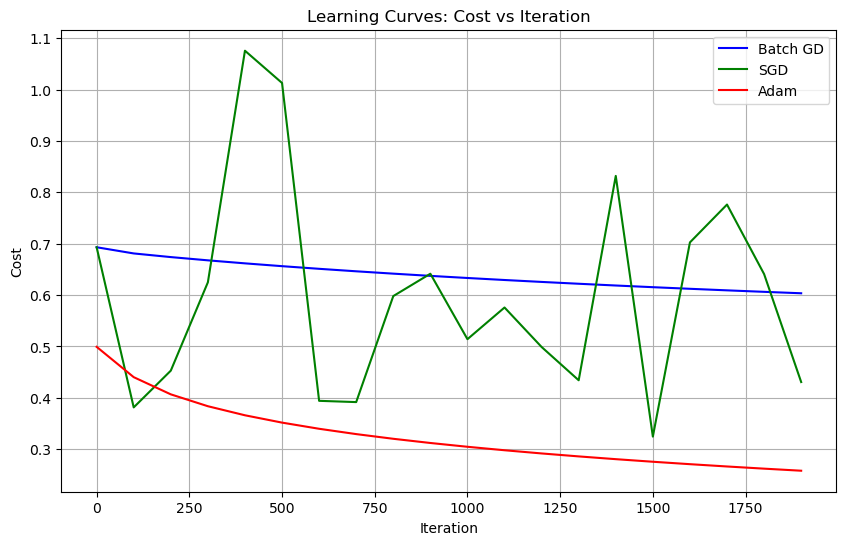

In [61]:
import matplotlib.pyplot as plt

# Prepare iteration axes
# Note: costs are recorded every 100 iterations in our implementations
iterations_gd = [i*100 for i in range(len(log_reg['costs']))]
iterations_sgd = [i*100 for i in range(len(log_reg_sgd['costs']))]
iterations_adam = [i*100 for i in range(len(log_reg_adam['costs']))]

# Plot
plt.figure(figsize=(10,6))
plt.plot(iterations_gd, log_reg['costs'], label='Batch GD', color='blue')
plt.plot(iterations_sgd, log_reg_sgd['costs'], label='SGD', color='green')
plt.plot(iterations_adam, log_reg_adam['costs'], label='Adam', color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Learning Curves: Cost vs Iteration')
plt.legend()
plt.grid(True)
plt.show()


#Different Learning Rates

In [62]:
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1]
num_iterations_gd = 2000      # Batch GD iterations
num_iterations_sgd = 20000    # SGD needs more iterations
num_iterations_adam = 2000    # Adam usually converges fast


In [63]:
results_all = {'GD': {}, 'SGD': {}, 'Adam': {}}

for lr in learning_rates:
    print(f"\n--- Learning rate = {lr} ---")

    # Batch GD
    print("Training Batch GD...")
    gd_model = model(X_train, y_train, X_test, y_test,
                     num_iterations=num_iterations_gd,
                     learning_rate=lr,
                     print_cost=False)
    results_all['GD'][lr] = {
        'losses': gd_model['costs'],
        'train_acc': 100 - np.mean(np.abs(gd_model['Y_prediction_train'] - y_train) * 100),
        'test_acc': 100 - np.mean(np.abs(gd_model['Y_prediction_test'] - y_test) * 100)
    }



--- Learning rate = 0.0001 ---
Training Batch GD...
train accuracy: 57.6253110558123
test accuracy: 60.66098081023454

--- Learning rate = 0.001 ---
Training Batch GD...
train accuracy: 72.52044081052257
test accuracy: 72.70788912579957

--- Learning rate = 0.01 ---
Training Batch GD...
train accuracy: 78.35051546391753
test accuracy: 75.5863539445629

--- Learning rate = 0.05 ---
Training Batch GD...
train accuracy: 82.26093138997511
test accuracy: 76.97228144989339

--- Learning rate = 0.1 ---
Training Batch GD...
train accuracy: 83.32740846071809
test accuracy: 76.43923240938166


In [66]:
for lr in learning_rates:
    # SGD
    print("Training SGD...")
    sgd_model = model_stoc(X_train, y_train, X_test, y_test,
                           num_iterations=num_iterations_sgd,
                           learning_rate=lr,
                           print_cost=False)
    results_all['SGD'][lr] = {
        'losses': sgd_model['costs'],
        'train_acc': sgd_model['train_accuracy'],
        'test_acc': sgd_model['test_accuracy']
    }

    

Training SGD...
train accuracy: 71.98720227515108
test accuracy: 72.92110874200426
Training SGD...
train accuracy: 78.3149662282261
test accuracy: 76.11940298507463
Training SGD...
train accuracy: 80.80341272662638
test accuracy: 76.01279317697228
Training SGD...
train accuracy: 80.76786349093494
test accuracy: 72.28144989339019
Training SGD...


C:\Users\manis\AppData\Local\Temp\ipykernel_34940\286416654.py:60: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
C:\Users\manis\AppData\Local\Temp\ipykernel_34940\286416654.py:60: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


train accuracy: 77.17739068610025
test accuracy: 71.85501066098081


In [67]:
# Adam
for lr in learning_rates:
    print("Training Adam...")
    adam_model = model_adam(X_train, y_train, X_test, y_test,
                            num_iterations=num_iterations_adam,
                            learning_rate=lr,
                            print_cost=False)
    results_all['Adam'][lr] = {
        'losses': adam_model['costs'],
        'train_acc': adam_model['train_accuracy'],
        'test_acc': adam_model['test_accuracy']
    }


Training Adam...
train accuracy (Adam): 81.90543903306079
test accuracy (Adam): 76.11940298507463
Training Adam...
train accuracy (Adam): 89.93956629932457
test accuracy (Adam): 75.5863539445629
Training Adam...


C:\Users\manis\AppData\Local\Temp\ipykernel_34940\286416654.py:60: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
C:\Users\manis\AppData\Local\Temp\ipykernel_34940\286416654.py:60: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


train accuracy (Adam): 94.52541770351938
test accuracy (Adam): 72.49466950959489
Training Adam...
train accuracy (Adam): 95.34305012442232
test accuracy (Adam): 71.00213219616205
Training Adam...
train accuracy (Adam): 95.76964095271951
test accuracy (Adam): 70.8955223880597


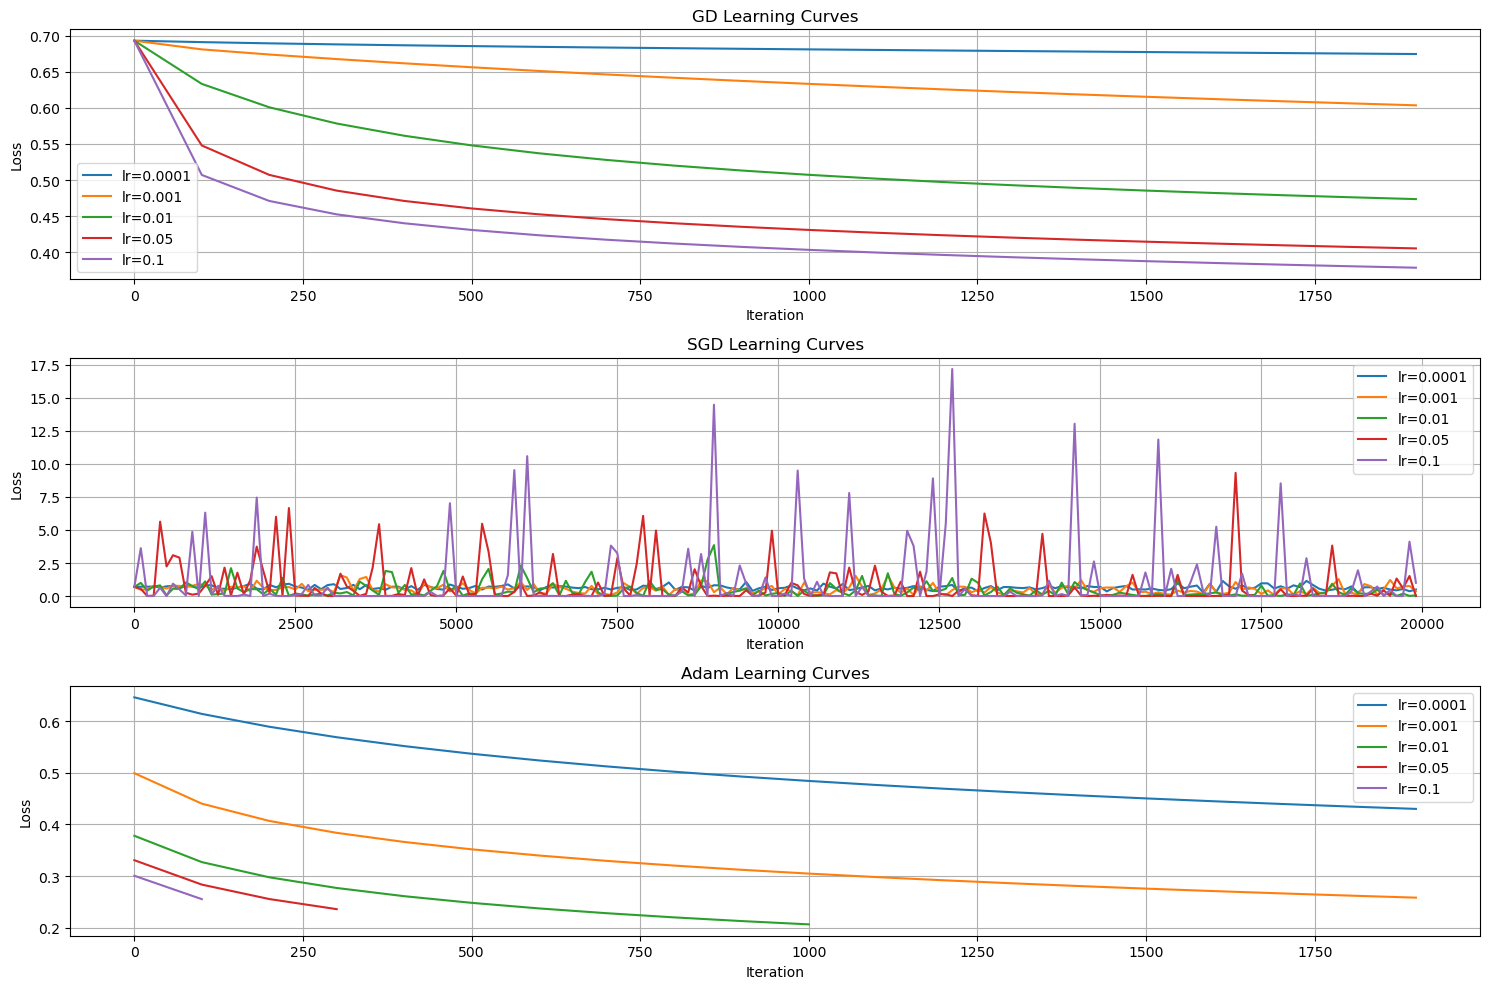

In [68]:
import matplotlib.pyplot as plt

optimizers = ['GD', 'SGD', 'Adam']
colors = {'GD': 'blue', 'SGD': 'green', 'Adam': 'red'}

plt.figure(figsize=(15,10))

for opt in optimizers:
    plt.subplot(3,1,optimizers.index(opt)+1)
    for lr in learning_rates:
        iterations = [i*100 for i in range(len(results_all[opt][lr]['losses']))]
        plt.plot(iterations, results_all[opt][lr]['losses'], label=f'lr={lr}')
    plt.title(f'{opt} Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
for opt in optimizers:
    print(f"\n--- {opt} Final Accuracies ---")
    for lr in learning_rates:
        train_acc = results_all[opt][lr]['train_acc']
        test_acc = results_all[opt][lr]['test_acc']
        print(f"Learning rate {lr}: Train = {train_acc:.2f}%, Test = {test_acc:.2f}%")



--- GD Final Accuracies ---
Learning rate 0.0001: Train = 57.63%, Test = 60.66%
Learning rate 0.001: Train = 72.52%, Test = 72.71%
Learning rate 0.01: Train = 78.35%, Test = 75.59%
Learning rate 0.05: Train = 82.26%, Test = 76.97%
Learning rate 0.1: Train = 83.33%, Test = 76.44%

--- SGD Final Accuracies ---
Learning rate 0.0001: Train = 71.77%, Test = 73.56%
Learning rate 0.001: Train = 77.96%, Test = 76.12%
Learning rate 0.01: Train = 79.49%, Test = 74.41%
Learning rate 0.05: Train = 73.12%, Test = 68.23%
Learning rate 0.1: Train = 79.56%, Test = 72.07%

--- Adam Final Accuracies ---
Learning rate 0.0001: Train = 81.91%, Test = 76.12%
Learning rate 0.001: Train = 89.94%, Test = 75.59%
Learning rate 0.01: Train = 94.53%, Test = 72.49%
Learning rate 0.05: Train = 95.34%, Test = 71.00%
Learning rate 0.1: Train = 95.77%, Test = 70.90%


When the learning rate is too small, the optimization process becomes slow, and the model may fail to converge to the global minimum within the limited training iterations.
On the other hand, an excessively large learning rate can cause the model to move too quickly, resulting in overshooting the global minimum and unstable convergence.

We see that on higher learning rates, the Adam optimizer starts to overfit and test accuracy starts to decrease maybe because it overshoots global minima and starts to learn the noise. Also Adam's per-parameter learning rates can become too aggressive
